2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Number of training samples: 8982
Number of test samples: 2246
Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.2359 - loss: 3.5424 - val_accuracy: 0.5058 - val_loss: 2.9546
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4625 - loss: 2.6585 - val_accuracy: 0.5632 - val_loss: 1.9991
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5464 - loss: 1.9723 - val_accuracy: 0.6522 - val_loss: 1.6017
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6078 - loss: 1.6345 - val_accuracy: 0.6873 - val_loss: 1.4190
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6550 - loss: 1.4584 - val_accuracy: 0.6995 - val_loss: 1.3041
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6841 - loss: 1.3147 - val_accuracy: 0.7078 - val_loss: 1.2330
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7119 - loss: 1.2035 - val_accuracy: 0.7251 - val_loss: 1.1773


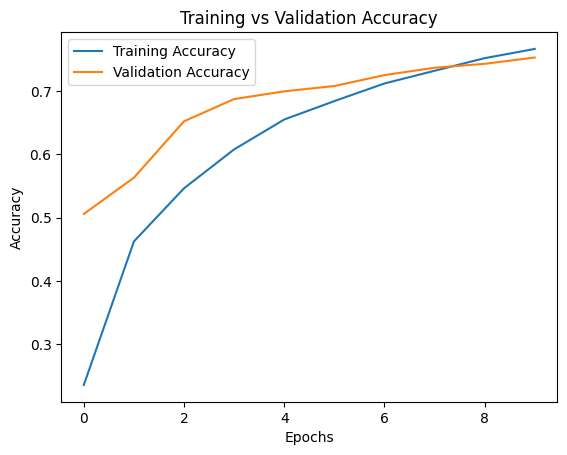

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7400 - loss: 1.1329

Test Accuracy: 0.7400
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


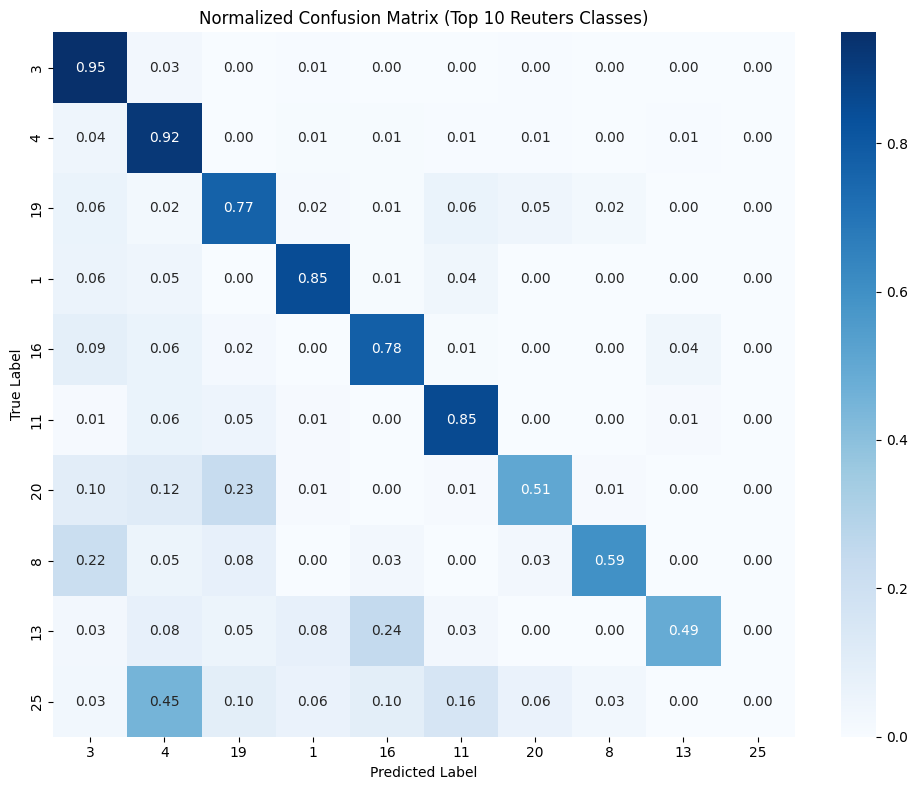

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Predicted topic class: 11 (Confidence: 0.0567)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
# Import Input and Dropout
from tensorflow.keras.layers import Dense, Input, Dropout 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# --- Data Loading (Your code is correct) ---
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")
 

# --- Data Preprocessing (Your code is correct) ---
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
 
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
 
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
 
 
# --- Model Building (Improved) ---
model = Sequential([
    # FIX 1: Add an explicit Input layer
    Input(shape=(10000,)),
    
    Dense(64, activation='relu'),
    # FIX 2: Add Dropout to fight overfitting
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    # FIX 2: Add Dropout again
    Dropout(0.4),
    
    Dense(46, activation='softmax')
])
 
# --- Model Compile (Your code is correct) ---
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
# --- Model Training (Your code is correct) ---
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)
 
# --- Plotting (Your code is correct) ---
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
 
# --- Evaluation (Your code is correct) ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
 
# --- Confusion Matrix (Your code is correct) ---
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
 
(unique, counts) = np.unique(y_true, return_counts=True)
sorted_indices = np.argsort(-counts)
top_classes = unique[sorted_indices[:10]]
 
mask = np.isin(y_true, top_classes)
y_true_top10 = y_true[mask]
y_pred_top10 = y_pred[mask]
 
cm_top10 = confusion_matrix(y_true_top10, y_pred_top10, labels=top_classes)
 
cm_top10_normalized = cm_top10.astype('float') / cm_top10.sum(axis=1)[:, np.newaxis]
 
plt.figure(figsize=(10, 8))
sns.heatmap(cm_top10_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=top_classes, yticklabels=top_classes)
plt.title("Normalized Confusion Matrix (Top 10 Reuters Classes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
 
# --- Saving and Loading (Your code is correct) ---
model.save("reuters_news_model.h5")
model = load_model("reuters_news_model.h5")
 
# --- Prediction on New Text (Your code is correct) ---
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
 
def encode_new_text(text, word_index, max_words=10000):
    tokens = text.lower().split()
    encoded = [word_index.get(word, 0) for word in tokens]
    vectorized = np.zeros((1, max_words))
    for index in encoded:
        if index < max_words:
            vectorized[0, index] = 1
    return vectorized
 
new_text = "The stock market saw a major shift as tech companies surged in the second quarter"
x_input = encode_new_text(new_text, word_index)
 
prediction = model.predict(x_input)
predicted_class = np.argmax(prediction[0])
 
print(f"Predicted topic class: {predicted_class} (Confidence: {np.max(prediction[0]):.4f})")